In [7]:
pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 106.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 147.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 203.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 198.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 168.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
Note: you may need to restart the kernel to use updated packages.


In [1]:


import random
import os
import pandas as pd
import time
seconds = time.time()


def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("Tthe folder could not be created!")
        


print("This process may take 3 to 8 minutes, depending on the performance of your computer.\n\n\n")




# Headers of column
main_labels=["Flow ID","Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp","Flow Duration","Total Fwd Packets",
   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max","Idle Min","Label","External IP"]
main_labels=( ",".join( i for i in main_labels ) )

attacks=["BENIGN", "Bot", "DDoS", "DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris", "FTP-Patator", "Heartbleed", "Infiltration", "PortScan", "SSH-Patator", "Web Attack – Brute Force", "Web Attack – Sql Injection", "Web Attack – XSS"]
folder("./attacks/")

benign=2359289

dict_attack={
"Bot":1966,
"DDoS":41835,
"DoS GoldenEye":10293,
"DoS Hulk":231073,
"DoS Slowhttptest":5499,
"DoS slowloris":5796,
"FTP-Patator":7938,
"Heartbleed":11,
"Infiltration":36,
"PortScan":158930,
"SSH-Patator":5897,
"Web Attack - Brute Force":1507,
"Web Attack - XSS":652,
"Web Attack - Sql Injection":21}



for i in dict_attack: # in this section, a file is opened for each attack type and is recorded at a random benign flow.
    a,b=0,0
    ths = open("/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/src/cicids2017/attacks"+i + ".csv", "w")
    ths.write(str(main_labels)+"\n")
    benign_num=int(benign/(dict_attack[i]*(7/3)))
    with open("/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/datasets/cicids2017/all_data.csv", "r") as file:
        while True:
            try:
                line=file.readline()
                line=line[:-1]
                k=line.split(",")
                if k[83]=="BENIGN":
                    rnd=random.randint(1,benign_num)
                    if rnd==1:
                            ths.write(str(line)+"\n")
                            b+=1
                if  k[83]==i:
                    ths.write(str(line)+"\n")
                    a+=1
                else:
                    continue                       
            except:
                break
    ths.close()
    print(i ,"file is completed\n attack:%d\n benign:%d\n\n\n " %(a,b))

    
##All web attack files are merged into a single file.
webs=["Web Attack - Brute Force","Web Attack - XSS","Web Attack - Sql Injection"]
flag=True
for i in webs:
    df=pd.read_csv("/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/src/cicids2017/attacks"+str(i)+".csv")
    if flag:
        df.to_csv('/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/src/cicids2017/attacks/Web Attack.csv' ,index = False)
        flag=False
    else:
        df.to_csv('/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/src/cicids2017/attacks/Web Attack.csv' ,index = False,header=False,mode="a")
    os.remove("/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/src/cicids2017/attacks/"+str(i)+".csv")







print("mission accomplished!")
print("operation time: = ",time.time()- seconds ,"secomds")

This process may take 3 to 8 minutes, depending on the performance of your computer.



Bot file is completed
 attack:1966
 benign:4218


 
DDoS file is completed
 attack:41835
 benign:91817


 
DoS GoldenEye file is completed
 attack:10293
 benign:22324


 
DoS Hulk file is completed
 attack:231073
 benign:550093


 
DoS Slowhttptest file is completed
 attack:5499
 benign:11901


 
DoS slowloris file is completed
 attack:5796
 benign:12680


 
FTP-Patator file is completed
 attack:7938
 benign:17474


 
Heartbleed file is completed
 attack:11
 benign:22


 
Infiltration file is completed
 attack:36
 benign:78


 
PortScan file is completed
 attack:158930
 benign:366755


 
SSH-Patator file is completed
 attack:5897
 benign:12698


 
Web Attack - Brute Force file is completed
 attack:0
 benign:3304


 
Web Attack - XSS file is completed
 attack:0
 benign:1426


 
Web Attack - Sql Injection file is completed
 attack:0
 benign:55


 
mission accomplished!
operation time: =  151.535349130

DoS slowloris importance list:
DoS slowloris 
                              importance
Features                               
Flow IAT Mean                  0.438470
Total Length of Bwd Packets    0.107356
Flow IAT Std                   0.017300
Bwd Packet Length Mean         0.014257
Total Fwd Packets              0.010878
Fwd IAT Total                  0.009157
Fwd Packet Length Min          0.006427
Flow Bytes/s                   0.001471
Flow Duration                  0.001077
Bwd Packet Length Std          0.000977
Fwd Packet Length Max          0.000908
Flow IAT Max                   0.000888
Fwd Packet Length Mean         0.000808
Total Length of Fwd Packets    0.000752
Flow IAT Min                   0.000603
Bwd Packet Length Max          0.000524
Flow Packets/s                 0.000432
Fwd Packet Length Std          0.000292
Total Backward Packets         0.000241
Bwd Packet Length Min          0.000004 



DoS slowloris=["Flow IAT Mean","Total Length of Bwd Packets","Flow IA

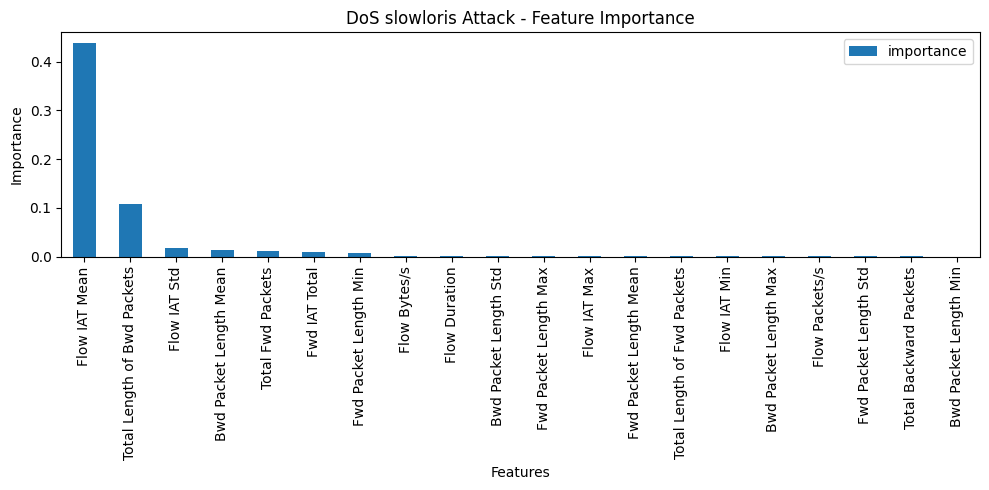

-----------------------------------------------------------------------------------------------




SSH-Patator importance list:
SSH-Patator 
                              importance
Features                               
Flow Bytes/s                   0.001042
Fwd Packet Length Max          0.000904
Flow IAT Max                   0.000634
Flow Duration                  0.000628
Flow IAT Mean                  0.000595
Flow Packets/s                 0.000565
Total Length of Fwd Packets    0.000488
Fwd IAT Total                  0.000335
Flow IAT Std                   0.000210
Flow IAT Min                   0.000140
Fwd Packet Length Mean         0.000140
Fwd Packet Length Min          0.000131
Bwd Packet Length Min          0.000115
Total Backward Packets         0.000092
Fwd Packet Length Std          0.000077
Total Fwd Packets              0.000064
Bwd Packet Length Mean         0.000014
Bwd Packet Length Max          0.000014
Total Length of Bwd Packets    0.000012
Bwd Packet Length

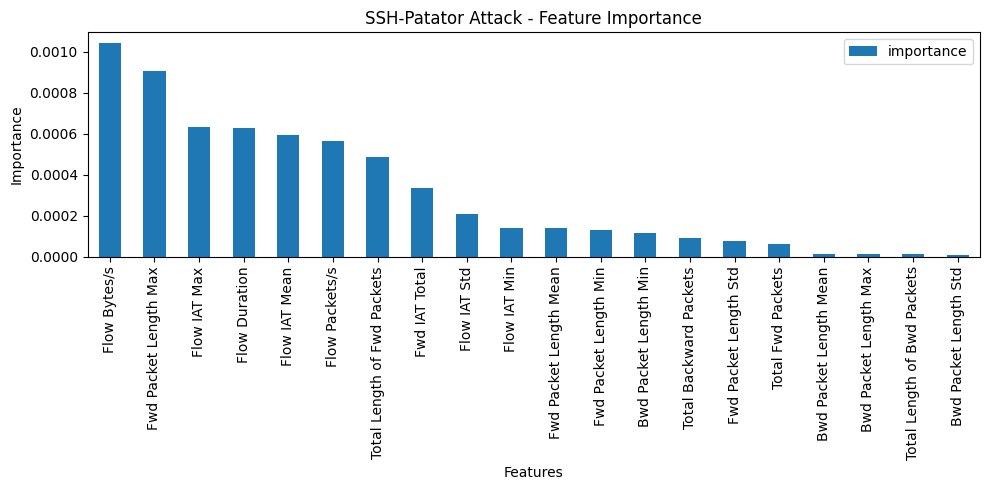

-----------------------------------------------------------------------------------------------




FTP-Patator importance list:
FTP-Patator 
                              importance
Features                               
Fwd Packet Length Max          0.142878
Fwd Packet Length Std          0.024673
Fwd Packet Length Mean         0.016816
Bwd Packet Length Std          0.001222
Total Length of Bwd Packets    0.000432
Bwd Packet Length Max          0.000410
Bwd Packet Length Mean         0.000289
Flow IAT Max                   0.000224
Flow IAT Min                   0.000203
Flow Duration                  0.000179
Total Fwd Packets              0.000149
Flow IAT Std                   0.000103
Total Backward Packets         0.000100
Flow IAT Mean                  0.000098
Total Length of Fwd Packets    0.000068
Fwd IAT Total                  0.000060
Fwd Packet Length Min          0.000050
Flow Packets/s                 0.000047
Flow Bytes/s                   0.000015
Bwd Packet Length

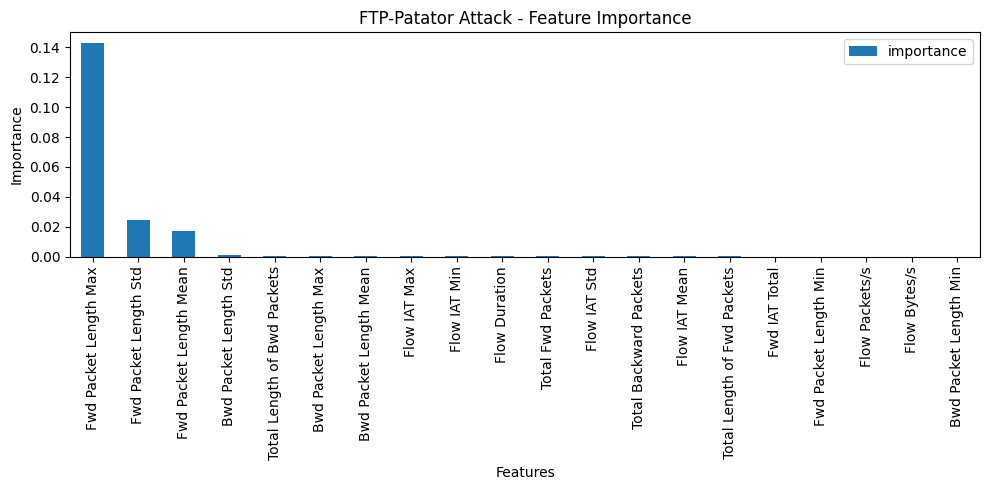

-----------------------------------------------------------------------------------------------




DoS GoldenEye importance list:
DoS GoldenEye 
                              importance
Features                               
Flow IAT Max                   0.538471
Total Backward Packets         0.046248
Flow IAT Min                   0.016173
Fwd Packet Length Max          0.001809
Bwd Packet Length Std          0.001390
Total Length of Fwd Packets    0.001239
Bwd Packet Length Mean         0.001216
Flow Duration                  0.001018
Fwd IAT Total                  0.000850
Fwd Packet Length Min          0.000787
Fwd Packet Length Mean         0.000546
Bwd Packet Length Max          0.000431
Flow Bytes/s                   0.000390
Flow Packets/s                 0.000197
Flow IAT Mean                  0.000172
Total Length of Bwd Packets    0.000163
Flow IAT Std                   0.000153
Fwd Packet Length Std          0.000086
Bwd Packet Length Min          0.000053
Total Fwd Pac

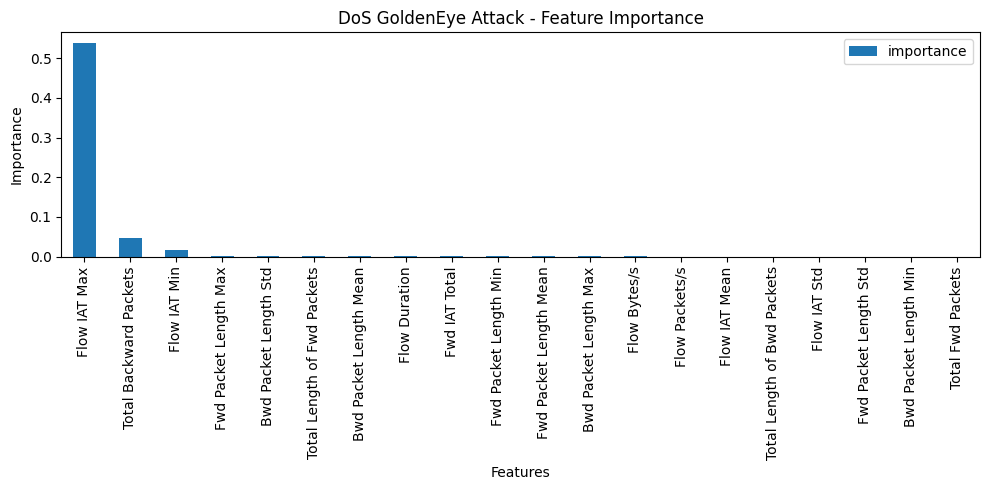

-----------------------------------------------------------------------------------------------




DDoS importance list:
DDoS 
                              importance
Features                               
Bwd Packet Length Std          0.462897
Total Backward Packets         0.096175
Fwd IAT Total                  0.009626
Flow Duration                  0.007625
Flow IAT Min                   0.006235
Total Length of Fwd Packets    0.005839
Flow IAT Std                   0.005639
Flow IAT Mean                  0.005481
Flow Bytes/s                   0.005108
Flow IAT Max                   0.004815
Fwd Packet Length Max          0.002380
Flow Packets/s                 0.001050
Bwd Packet Length Max          0.000666
Fwd Packet Length Mean         0.000469
Bwd Packet Length Min          0.000460
Fwd Packet Length Std          0.000336
Bwd Packet Length Mean         0.000227
Total Length of Bwd Packets    0.000152
Total Fwd Packets              0.000040
Fwd Packet Length Min          

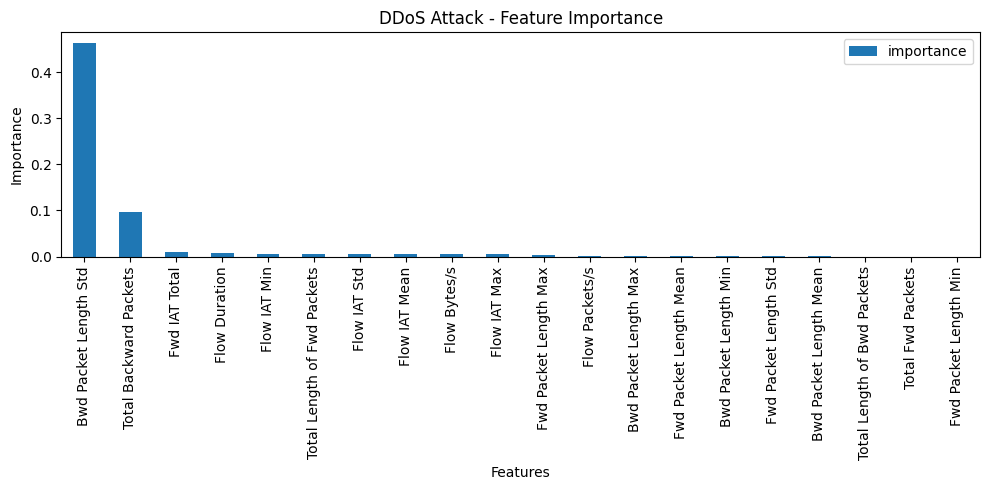

-----------------------------------------------------------------------------------------------




PortScan importance list:
PortScan 
                                importance
Features                                 
Flow Bytes/s                 3.070891e-01
Total Length of Fwd Packets  3.070631e-01
Flow Duration                3.355557e-04
Flow IAT Mean                2.593677e-04
Flow IAT Max                 2.166175e-04
Fwd Packet Length Max        1.608343e-04
Fwd IAT Total                1.012331e-04
Total Length of Bwd Packets  8.844553e-05
Flow IAT Min                 5.607514e-05
Bwd Packet Length Min        4.765121e-05
Flow Packets/s               3.716166e-05
Bwd Packet Length Max        2.924787e-05
Fwd Packet Length Mean       2.607993e-05
Bwd Packet Length Mean       2.459326e-05
Bwd Packet Length Std        2.023117e-05
Total Fwd Packets            1.895713e-05
Flow IAT Std                 1.694594e-05
Total Backward Packets       1.131439e-05
Fwd Packet Length Std  

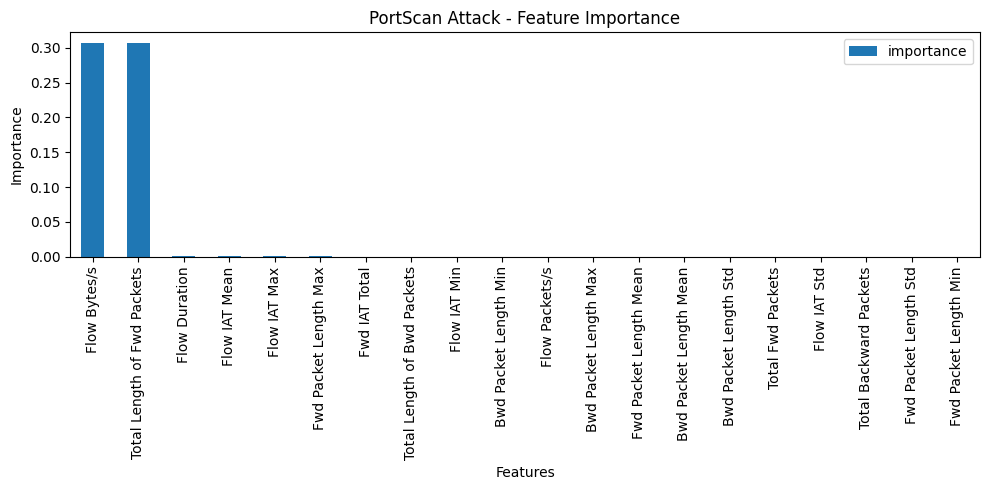

-----------------------------------------------------------------------------------------------




Heartbleed importance list:
Heartbleed 
                              importance
Features                               
Bwd Packet Length Mean            0.068
Total Length of Bwd Packets       0.056
Total Backward Packets            0.052
Total Fwd Packets                 0.048
Bwd Packet Length Max             0.048
Fwd IAT Total                     0.020
Bwd Packet Length Std             0.016
Flow IAT Min                      0.016
Total Length of Fwd Packets       0.012
Flow Duration                     0.012
Flow Bytes/s                      0.012
Fwd Packet Length Max             0.000
Bwd Packet Length Min             0.000
Fwd Packet Length Std             0.000
Fwd Packet Length Min             0.000
Fwd Packet Length Mean            0.000
Flow IAT Mean                     0.000
Flow Packets/s                    0.000
Flow IAT Max                      0.000
Flow IAT Std       

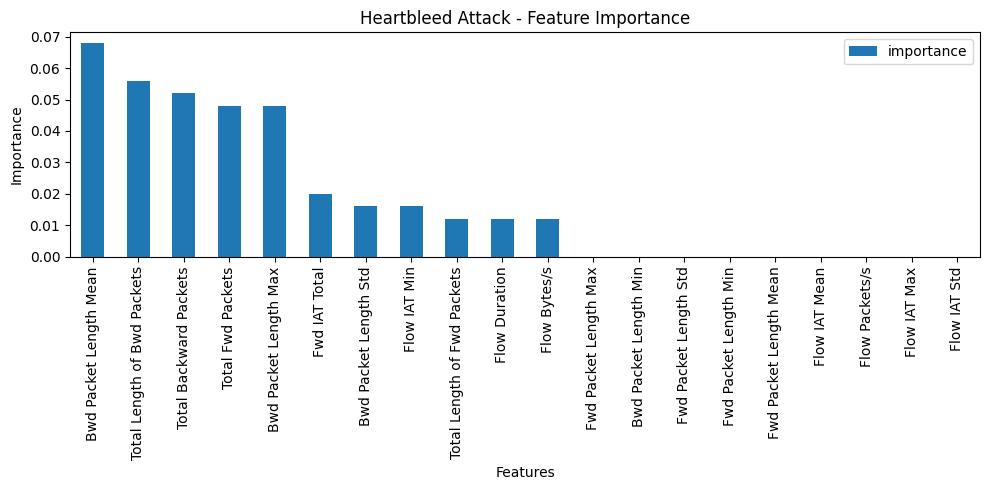

-----------------------------------------------------------------------------------------------




Web Attack importance list:
Web Attack 
                              importance
Features                               
Flow Duration                       0.0
Total Fwd Packets                   0.0
Total Backward Packets              0.0
Total Length of Fwd Packets         0.0
Total Length of Bwd Packets         0.0
Fwd Packet Length Max               0.0
Fwd Packet Length Min               0.0
Fwd Packet Length Mean              0.0
Fwd Packet Length Std               0.0
Bwd Packet Length Max               0.0
Bwd Packet Length Min               0.0
Bwd Packet Length Mean              0.0
Bwd Packet Length Std               0.0
Flow Bytes/s                        0.0
Flow Packets/s                      0.0
Flow IAT Mean                       0.0
Flow IAT Std                        0.0
Flow IAT Max                        0.0
Flow IAT Min                        0.0
Fwd IAT Total      

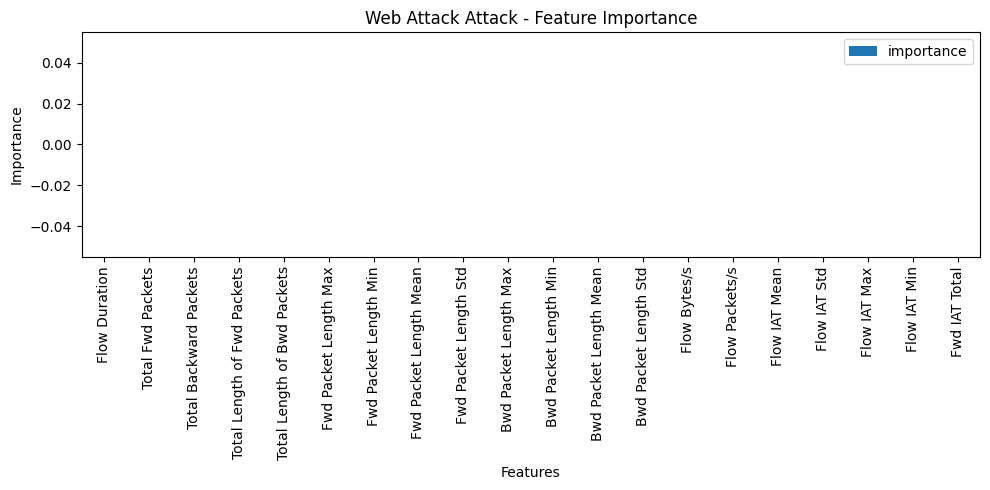

-----------------------------------------------------------------------------------------------




DoS Slowhttptest importance list:
DoS Slowhttptest 
                              importance
Features                               
Flow IAT Mean                  0.642427
Fwd Packet Length Min          0.086447
Total Length of Bwd Packets    0.021731
Bwd Packet Length Mean         0.020295
Fwd Packet Length Std          0.014234
Fwd Packet Length Mean         0.011528
Bwd Packet Length Std          0.010163
Bwd Packet Length Max          0.003962
Flow IAT Min                   0.001980
Fwd Packet Length Max          0.001288
Bwd Packet Length Min          0.001200
Total Backward Packets         0.001023
Flow Duration                  0.000877
Total Length of Fwd Packets    0.000551
Fwd IAT Total                  0.000332
Flow IAT Max                   0.000317
Total Fwd Packets              0.000300
Flow IAT Std                   0.000239
Flow Bytes/s                   0.000162
Flow Pa

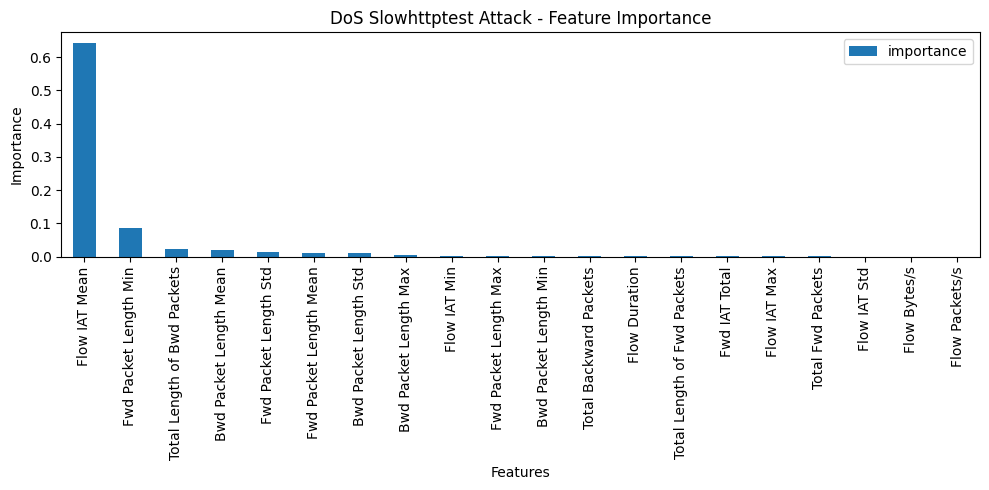

-----------------------------------------------------------------------------------------------




Bot importance list:
Bot 
                              importance
Features                               
Bwd Packet Length Mean         0.344682
Flow IAT Min                   0.017154
Flow IAT Mean                  0.014375
Flow IAT Max                   0.005706
Flow Duration                  0.004313
Flow IAT Std                   0.002456
Flow Bytes/s                   0.000875
Flow Packets/s                 0.000719
Total Backward Packets         0.000440
Fwd IAT Total                  0.000324
Total Length of Fwd Packets    0.000190
Bwd Packet Length Max          0.000174
Total Fwd Packets              0.000132
Fwd Packet Length Min          0.000123
Total Length of Bwd Packets    0.000118
Fwd Packet Length Std          0.000085
Fwd Packet Length Max          0.000064
Fwd Packet Length Mean         0.000050
Bwd Packet Length Std          0.000041
Bwd Packet Length Min          0.

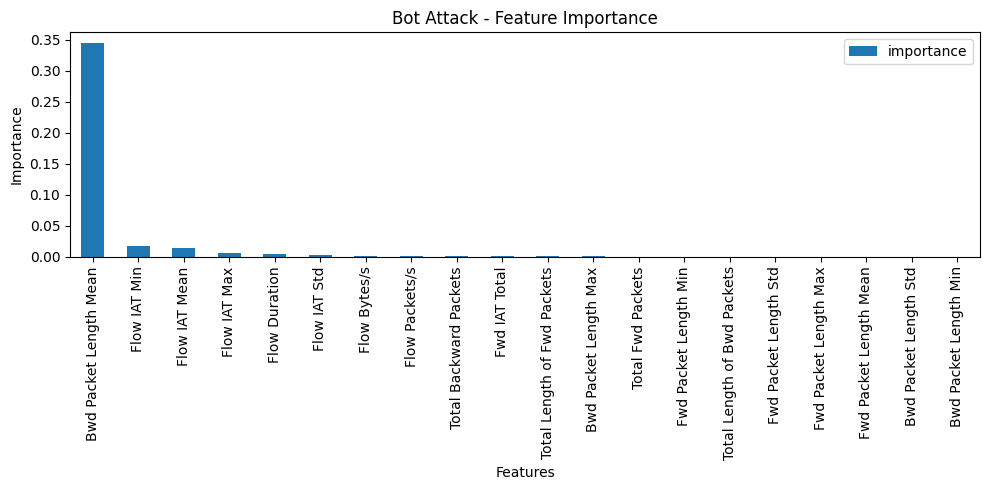

-----------------------------------------------------------------------------------------------




DoS Hulk importance list:
DoS Hulk 
                                importance
Features                                 
Bwd Packet Length Std        5.087033e-01
Fwd Packet Length Std        7.724677e-02
Flow Duration                1.776313e-03
Flow IAT Min                 1.718891e-03
Fwd Packet Length Max        7.576649e-04
Total Backward Packets       3.273600e-04
Flow IAT Max                 2.561914e-04
Fwd IAT Total                2.125083e-04
Total Length of Bwd Packets  1.491757e-04
Flow IAT Std                 1.055544e-04
Flow Packets/s               9.547362e-05
Flow IAT Mean                8.860084e-05
Bwd Packet Length Mean       3.237510e-05
Flow Bytes/s                 2.681676e-05
Bwd Packet Length Max        1.216074e-05
Total Fwd Packets            1.110355e-05
Fwd Packet Length Mean       1.082061e-05
Bwd Packet Length Min        8.702821e-06
Total Length of Fwd Pac

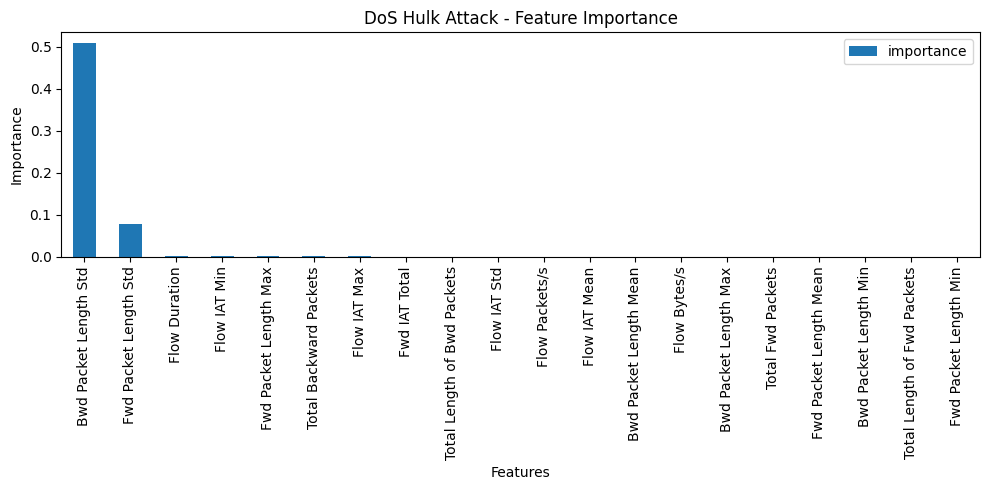

-----------------------------------------------------------------------------------------------




Infiltration importance list:
Infiltration 
                              importance
Features                               
Fwd Packet Length Mean         0.092416
Flow Duration                  0.052192
Total Backward Packets         0.050878
Total Length of Fwd Packets    0.039298
Bwd Packet Length Mean         0.012137
Flow IAT Min                   0.009685
Flow IAT Max                   0.008608
Bwd Packet Length Std          0.008118
Flow IAT Mean                  0.007859
Flow IAT Std                   0.006045
Bwd Packet Length Max          0.005797
Fwd Packet Length Std          0.005653
Flow Packets/s                 0.004589
Flow Bytes/s                   0.004582
Fwd IAT Total                  0.004101
Total Fwd Packets              0.003044
Total Length of Bwd Packets    0.002082
Fwd Packet Length Min          0.002003
Bwd Packet Length Min          0.001527
Fwd Packet Leng

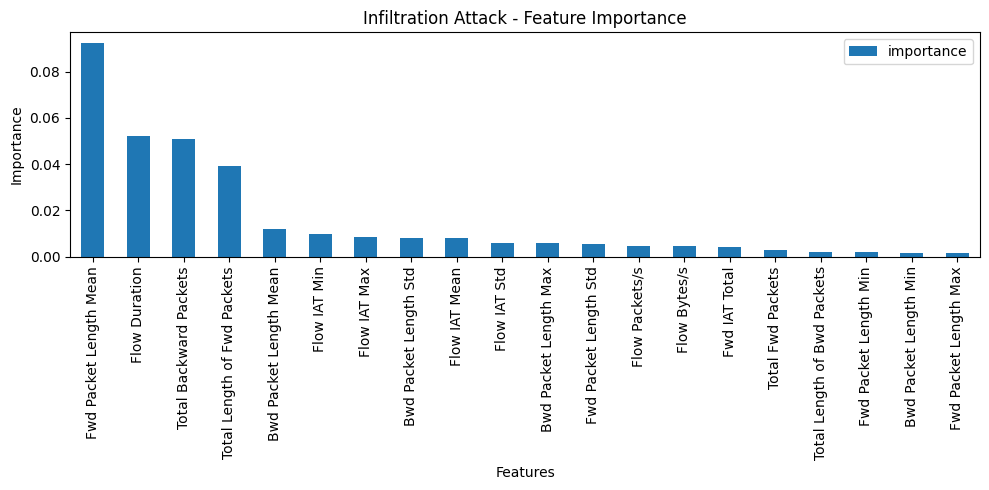

-----------------------------------------------------------------------------------------------




mission accomplished!
Total operation time: =  5501.903807640076 seconds


In [5]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# CSV files names:
csv_files=os.listdir("/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/src/cicids2017/attacks")# It creates a list of file names in the "attacks" folder.

# Headers of column
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_for_attack_files.csv", "w")
folder("./feature_pics/")
for j in csv_files:
    df=pd.read_csv("/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/src/cicids2017/attacks/"+j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
    
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0
   

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feature_pics/"+j[0:-4]+".pdf",bbox_inches='tight',  format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()

In [9]:
import torch

print("PyTorch version:", torch.__version__)
print("Is GPU available:", torch.cuda.is_available())
print("Current GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")



PyTorch version: 2.2.1+cu121
Is GPU available: True
Current GPU: Tesla T4


In [10]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and enabled.")
    print("Current GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("No GPU devices found. Using CPU.")

# Test if PyTorch is using the GPU
print("PyTorch version:", torch.__version__)
print("Device being used:", device)

# Create a simple tensor operation to see if it runs on the GPU
a = torch.tensor([[1.0, 2.0, 3.0]], device=device)
b = torch.tensor([[4.0, 5.0, 6.0]], device=device)
c = torch.matmul(a, b.T)
print("Result of matrix multiplication:", c)

GPU is available and enabled.
Current GPU: Tesla T4
PyTorch version: 2.2.1+cu121
Device being used: cuda
Result of matrix multiplication: tensor([[32.]], device='cuda:0')


In [7]:
import torch

print("PyTorch version:", torch.__version__)
print("Is GPU available:", torch.cuda.is_available())
print("Current GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


PyTorch version: 2.2.1+cu121
Is GPU available: True
Current GPU: Tesla T4


In [6]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
import sklearn as sk
import time
seconds = time.time()

def folder(f_name): #this function creates a folder named "feaure_pics" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")
        

# CSV files names:
csv_files=["/teamspace/studios/this_studio/Anomoly_Threat_Detection_using_GNNs/datasets/cicids2017/all_data.csv"]# It creates a list of file names in the "attacks" folder.

# Headers of column
main_labels=["Flow Duration","Total Fwd Packets",   "Total Backward Packets","Total Length of Fwd Packets","Total Length of Bwd Packets","Fwd Packet Length Max","Fwd Packet Length Min",
   "Fwd Packet Length Mean","Fwd Packet Length Std","Bwd Packet Length Max","Bwd Packet Length Min","Bwd Packet Length Mean","Bwd Packet Length Std",
   "Flow Bytes/s","Flow Packets/s","Flow IAT Mean","Flow IAT Std","Flow IAT Max","Flow IAT Min","Fwd IAT Total","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max",
   "Fwd IAT Min","Bwd IAT Total","Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags","Bwd URG Flags",
   "Fwd Header Length","Bwd Header Length","Fwd Packets/s","Bwd Packets/s","Min Packet Length","Max Packet Length","Packet Length Mean","Packet Length Std",
   "Packet Length Variance","FIN Flag Count","SYN Flag Count","RST Flag Count","PSH Flag Count","ACK Flag Count","URG Flag Count","CWE Flag Count",
   "ECE Flag Count","Down/Up Ratio","Average Packet Size","Avg Fwd Segment Size","Avg Bwd Segment Size","Fwd Avg Bytes/Bulk",
   "Fwd Avg Packets/Bulk","Fwd Avg Bulk Rate","Bwd Avg Bytes/Bulk","Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate","Subflow Fwd Packets","Subflow Fwd Bytes",
   "Subflow Bwd Packets","Subflow Bwd Bytes","Init_Win_bytes_forward","Init_Win_bytes_backward","act_data_pkt_fwd",
   "min_seg_size_forward","Active Mean","Active Std","Active Max","Active Min",
    "Idle Mean","Idle Std","Idle Max", "Idle Min","Label"]

ths = open("importance_list_all_data.csv", "w")
folder("./feaure_pics/")
for j in csv_files:
    df=pd.read_csv(j,usecols=main_labels)
    df=df.fillna(0)
    attack_or_not=[]
    for i in df["Label"]:#it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i =="BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)           
    df["Label"]=attack_or_not

    y = df["Label"].values
    del df["Label"]
    X = df.values
   
   
    X = np.float32(X)
    X[np.isnan(X)] = 0
    X[np.isinf(X)] = 0


    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=j[0:-4]+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(j[0:-4],"importance list:")
    print(j[0:-4],"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(j[0:-4]+" Attack - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig("./feaure_pics/"+j[0:-4]+".pdf",bbox_inches='tight', papertype = 'a4', orientation = 'portrait', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    #plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

    
print("mission accomplished!")
print("Total operation time: = ",time.time()- seconds ,"secomds")
ths.close()